<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span><ul class="toc-item"><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Cleveland-Elyria,-OH" data-toc-modified-id="Cleveland-Elyria,-OH-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Cleveland-Elyria, OH</a></span></li></ul></li></ul></li><li><span><a href="#Data-Manipulation" data-toc-modified-id="Data-Manipulation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Manipulation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Los-Angeles-Long-Beach-Anaheim,-CA" data-toc-modified-id="Los-Angeles-Long-Beach-Anaheim,-CA-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Los Angeles-Long-Beach-Anaheim, CA</a></span></li><li><span><a href="#New-York,-NY" data-toc-modified-id="New-York,-NY-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>New York, NY</a></span></li><li><span><a href="#Tampa,-FL" data-toc-modified-id="Tampa,-FL-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Tampa, FL</a></span></li></ul></li></ul></li><li><span><a href="#Yearly-Average-AQI" data-toc-modified-id="Yearly-Average-AQI-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Yearly Average AQI</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Cleveland-Elyria,-OH" data-toc-modified-id="Cleveland-Elyria,-OH-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Cleveland-Elyria, OH</a></span></li><li><span><a href="#Los-Angeles-Long-Beach-Anaheim,-CA" data-toc-modified-id="Los-Angeles-Long-Beach-Anaheim,-CA-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Los Angeles-Long Beach-Anaheim, CA</a></span></li><li><span><a href="#New-York,-NY" data-toc-modified-id="New-York,-NY-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>New York, NY</a></span></li><li><span><a href="#Tampa,-FL" data-toc-modified-id="Tampa,-FL-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Tampa, FL</a></span></li></ul></li></ul></li><li><span><a href="#Merge-PM2.5" data-toc-modified-id="Merge-PM2.5-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Merge PM2.5</a></span></li><li><span><a href="#Time-Series-PM2.5" data-toc-modified-id="Time-Series-PM2.5-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Time Series PM2.5</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#All-4-cities" data-toc-modified-id="All-4-cities-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>All 4 cities</a></span></li><li><span><a href="#CLE-and-LA" data-toc-modified-id="CLE-and-LA-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>CLE and LA</a></span></li><li><span><a href="#LA-and-NY" data-toc-modified-id="LA-and-NY-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>LA and NY</a></span></li><li><span><a href="#NY-and-Tampa" data-toc-modified-id="NY-and-Tampa-5.0.4"><span class="toc-item-num">5.0.4&nbsp;&nbsp;</span>NY and Tampa</a></span></li></ul></li></ul></li></ul></div>

# Intro

The intial objective of this project was to identify a correlation between environmental factors, such as tree canopy percentage, green space, and air quality with acute respiratory illnesses. That is still a goal; however, I have modified it to add an element of machine learning. Realizing the need to provide a way to predict hazardous levels of air quality, I decided to apply popular (tried and true) statistical, classificational, forecasting, and outliers models. 

Here are list of sources used for this notebook:

- [EPA](https://www.epa.gov/outdoor-air-quality-data/air-quality-index-report)
- [EnviroAtlas](https://enviroatlas.epa.gov/enviroatlas/interactivemap/)

Here are list of references: 

 - [Using Machine Learning to Predict Air Quality
Index in New Delhi](https://arxiv.org/ftp/arxiv/papers/2112/2112.05753.pdf) by Samayan B. & Sk S.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pickle
import seaborn as sns
%matplotlib inline
import string
import collections
import statsmodels.api as sm

from statsmodels.regression.rolling import RollingOLS
from statsmodels.formula.api import ols
from sklearn.datasets import make_regression
from functools import reduce
from pandas.plotting import register_matplotlib_converters
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pandas.plotting import register_matplotlib_converters
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction import text
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction import text
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings 

## Data Wrangling

### Cleveland-Elyria, OH

In [2]:
pth0 = r'D:\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\ad_viz_tile_data_cle_.xlsx'
ds_cle19 = pd.read_excel(pth0)
ds_cle19

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,2019-01-01,39,PM2.5,GT Craig NCore,39-035-0060,AQS
1,2019-01-02,55,PM2.5,GT Craig NCore,39-035-0060,AQS
2,2019-01-03,48,PM2.5,GT Craig NCore,39-035-0060,AQS
3,2019-01-04,66,PM2.5,GT Craig NCore,39-035-0060,AQS
4,2019-01-05,83,PM2.5,GT Craig NCore,39-035-0060,AQS
...,...,...,...,...,...,...
726,2020-12-27,55,PM2.5,Cleveland Near Road,39-035-0073,AQS
727,2020-12-28,51,PM2.5,Cleveland Near Road,39-035-0073,AQS
728,2020-12-29,48,PM2.5,Harvard Yards,39-035-0065,AQS
729,2020-12-30,48,PM2.5,Cleveland Near Road,39-035-0073,AQS


In [3]:
ds_cle19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            731 non-null    datetime64[ns]
 1    AQI Value      731 non-null    int64         
 2   Main Pollutant  731 non-null    object        
 3   Site Name       731 non-null    object        
 4   Site ID         731 non-null    object        
 5   Source          731 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 34.4+ KB


Like before, we're mostly interested in PM2.5, or the amount of fine particulate matter per cubic meter of air. The 2.5 is its measure, as it is 2.5 micrometer in size. To compare, human hair is about 50-70 micrometer (microns) in diameter. Example particles that fall into the category of PM2.5 include combustion particles, organic compounds, and metals. PM10 (you guessed it, it's about 10 micrometers or less) include dust, pollen, and mold. The reason why PM2.5 are important is because when inhaled, they can interfere with O2 exchange and cause systemic inflammatory response. 

In [4]:
# We know this dataset has no nulls, but it doesn't hurt to check again. 
ds_cle19.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

As a reference for AQI levels:

- Good: **<50** (12 micrograms per cubic meter (µg/m3))
- Fair/Moderate: **51-100** (35 micrograms per cubic meter (µg/m3))
- Unhealthy for Sensitive Groups: **101-150** (55 micrograms per cubic meter (µg/m3))
- Unhealthy: **151-200 AQI** (70 micrograms per cubic meter (µg/m3))
- Very unhealthy: **201-300** (95 micrograms per cubic meter (µg/m3))
- Hazardous: **301-500** (120 micrograms per cubic meter (µg/m3))

In [5]:
# Save as new excel file
ds_cle19.to_excel('ds_cle19to20.xls', index=False)

In [6]:
# Parse and index Date
df_cle19to20 = pd.read_excel(r'D:\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\ds_cle19to20.xlsx')
df_cle19to20.head()

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,2019-01-01,39,PM2.5,GT Craig NCore,39-035-0060,AQS
1,2019-01-02,55,PM2.5,GT Craig NCore,39-035-0060,AQS
2,2019-01-03,48,PM2.5,GT Craig NCore,39-035-0060,AQS
3,2019-01-04,66,PM2.5,GT Craig NCore,39-035-0060,AQS
4,2019-01-05,83,PM2.5,GT Craig NCore,39-035-0060,AQS


In [7]:
#df_cle19to20 = df_cle19to20.set_index('Date')

In [8]:
df_cle19to20['Main Pollutant'].unique()

array(['PM2.5', 'Ozone', 'PM10', 'SO2'], dtype=object)

In [9]:
pivoted = df_cle19to20.pivot_table(index=['Date', 'Main Pollutant'])

In [10]:
pivoted

,,AQI Value
Date,Main Pollutant,
2019-01-01,PM2.5,39
2019-01-02,PM2.5,55
2019-01-03,PM2.5,48
2019-01-04,PM2.5,66
2019-01-05,PM2.5,83
...,...,...
2020-12-27,PM2.5,55
2020-12-28,PM2.5,51
2020-12-29,PM2.5,48


In [11]:
reset = pivoted.reset_index()
reset

,Date,Main Pollutant,AQI Value
0,2019-01-01,PM2.5,39
1,2019-01-02,PM2.5,55
2,2019-01-03,PM2.5,48
3,2019-01-04,PM2.5,66
4,2019-01-05,PM2.5,83
...,...,...,...
726,2020-12-27,PM2.5,55
727,2020-12-28,PM2.5,51
728,2020-12-29,PM2.5,48
729,2020-12-30,PM2.5,48


In [12]:
pivoted.columns

Index([' AQI Value'], dtype='object')

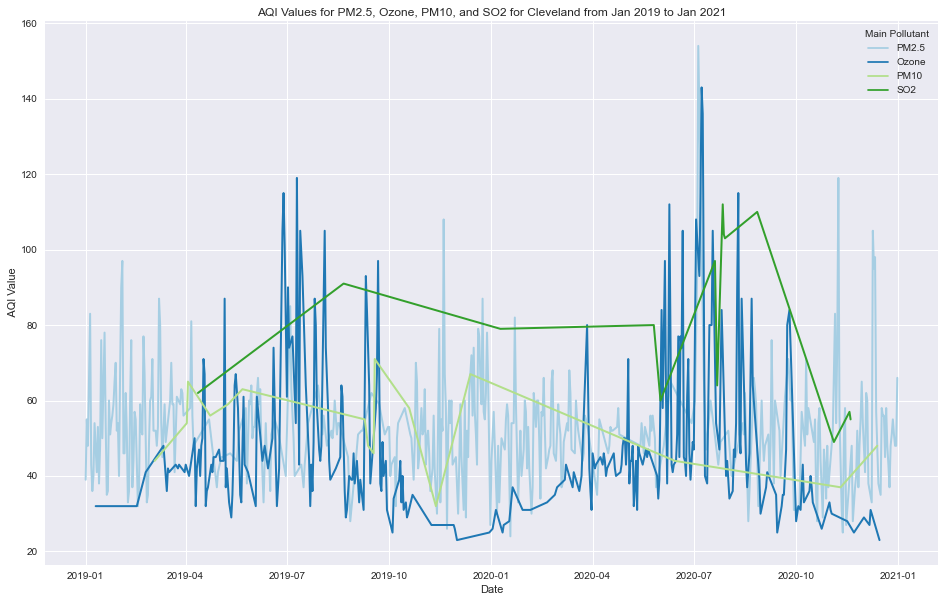

In [13]:
# Create time series for Main Pollutants
plt.style.use('seaborn')
plt.figure(figsize=(16,10))
sns.lineplot(data=pivoted.reset_index(), x='Date', y=' AQI Value', hue='Main Pollutant', palette='Paired', linewidth= 2.0)
plt.title('AQI Values for PM2.5, Ozone, PM10, and SO2 for Cleveland from Jan 2019 to Jan 2021')
plt.show()

Compared to SO2, PM 10 and Ozone, PM2.5 has a more seasonal trend. 

In [14]:
# Create separate df for each pollutant
pm25_cle = reset[reset["Main Pollutant"]=="PM2.5"]
ozo_cle = reset[reset["Main Pollutant"]=="Ozone"]
pm10_cle = reset[reset["Main Pollutant"]=="PM10"]
so2_cle = reset[reset["Main Pollutant"]=="SO2"]

In [15]:
print(pm25_cle.info())
print(ozo_cle.info())
print(pm10_cle.info())
print(so2_cle.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            415 non-null    datetime64[ns]
 1   Main Pollutant  415 non-null    object        
 2    AQI Value      415 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 13.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 9 to 714
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            286 non-null    datetime64[ns]
 1   Main Pollutant  286 non-null    object        
 2    AQI Value      286 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 62 to 712
Data columns (total 3 columns):
 #   Column        

Looks like there's more entries for PM2.5 (56.8% of the data). 

In [16]:
# Find out 95% quantile for each main pollutant
print('PM2.5 95 quantile: ', pm25_cle.quantile(0.95))
print('Ozone 95 quantile: ', ozo_cle.quantile(0.95))
print('PM10 95 quantile: ', pm10_cle.quantile(0.95))
print('SO2 95 quantile: ', so2_cle.quantile(0.95))

PM2.5 95 quantile:   AQI Value    77.3
Name: 0.95, dtype: float64
Ozone 95 quantile:   AQI Value    97.0
Name: 0.95, dtype: float64
PM10 95 quantile:   AQI Value    68.0
Name: 0.95, dtype: float64
SO2 95 quantile:   AQI Value    110.7
Name: 0.95, dtype: float64


So anything beyond each value we are going to consider an outlier. 

If we recall, fair/moderate AQI is from 51-100 and anything unhealthy is in the range 151-200. Let's see their averages.

In [17]:
# Averages for each pollutant
print('PM2.5 average: ', pm25_cle.mean())
print('Ozone average: ', ozo_cle.mean())
print('PM10 average: ', pm10_cle.mean())
print('SO2 average: ', so2_cle.mean())

PM2.5 average:   AQI Value    52.544578
dtype: float64
Ozone average:   AQI Value    49.437063
dtype: float64
PM10 average:   AQI Value    52.9375
dtype: float64
SO2 average:   AQI Value    80.214286
dtype: float64


# Data Manipulation

From the looks of it, the data for PM2.5 for Cleveland isn't too varying. But let's try replacing any outliers with percentile.

In [18]:
max_thresh = pm25_cle.quantile(0.95)

In [19]:
outliers = pm25_cle[pm25_cle[' AQI Value'].values > max_thresh.values]

In [20]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 4 to 710
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            21 non-null     datetime64[ns]
 1   Main Pollutant  21 non-null     object        
 2    AQI Value      21 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 672.0+ bytes


In [21]:
outliers

,Date,Main Pollutant,AQI Value
4,2019-01-05,PM2.5,83
17,2019-01-18,PM2.5,78
32,2019-02-02,PM2.5,90
33,2019-02-03,PM2.5,97
66,2019-03-08,PM2.5,87
67,2019-03-09,PM2.5,80
95,2019-04-06,PM2.5,81
184,2019-07-04,PM2.5,85
318,2019-11-15,PM2.5,79
322,2019-11-19,PM2.5,108


In [22]:
# Find min quartile for pm2.5
print('PM2.5 5 quantile: ', pm25_cle.quantile(0.05))

PM2.5 5 quantile:   AQI Value    32.0
Name: 0.05, dtype: float64


In [23]:
min_thresh = pm25_cle.quantile(0.05)
outliers1 = pm25_cle[pm25_cle[' AQI Value'].values > min_thresh.values]

In [24]:
outliers1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            392 non-null    datetime64[ns]
 1   Main Pollutant  392 non-null    object        
 2    AQI Value      392 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.2+ KB


In [25]:
outliers1

,Date,Main Pollutant,AQI Value
0,2019-01-01,PM2.5,39
1,2019-01-02,PM2.5,55
2,2019-01-03,PM2.5,48
3,2019-01-04,PM2.5,66
4,2019-01-05,PM2.5,83
...,...,...,...
726,2020-12-27,PM2.5,55
727,2020-12-28,PM2.5,51
728,2020-12-29,PM2.5,48
729,2020-12-30,PM2.5,48


5% percentile is 392 rows, which is too many to remove. 

In [26]:
pm25_cle_nomaxthresh = pm25_cle[(pm25_cle[' AQI Value'].values < max_thresh.values)]

In [27]:
pm25_cle_nomaxthresh

,Date,Main Pollutant,AQI Value
0,2019-01-01,PM2.5,39
1,2019-01-02,PM2.5,55
2,2019-01-03,PM2.5,48
3,2019-01-04,PM2.5,66
5,2019-01-06,PM2.5,43
...,...,...,...
726,2020-12-27,PM2.5,55
727,2020-12-28,PM2.5,51
728,2020-12-29,PM2.5,48
729,2020-12-30,PM2.5,48


This new dataset for PM2.5 is about 95% of the original data. The main purpose of having eliminated too much variation is to use this later for machine learning methods. Certain models, like Linear Discriminant Analysis and SVM, are sensitive to missing data. 

In [28]:
# Save this file
pm25_cle_nomaxthresh.to_excel('ds_cle_pm25cle_19to20.xlsx')

### Los Angeles-Long-Beach-Anaheim, CA

In [29]:
pth1 = r'D:\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\ad_viz_tile_data_la.xlsx'
ds_la = pd.read_excel(pth1)
ds_la

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,2019-01-01,67,PM2.5,Los Angeles-North Main Street,06-037-1103,AQS
1,2019-01-02,93,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AQS
2,2019-01-03,67,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AQS
3,2019-01-04,85,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AQS
4,2019-01-05,83,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AQS
...,...,...,...,...,...,...
726,2020-12-27,67,PM2.5,Los Angeles-North Main Street,06-037-1103,AQS
727,2020-12-28,51,PM2.5,Compton,06-037-1302,AQS
728,2020-12-29,64,PM2.5,Compton,06-037-1302,AQS
729,2020-12-30,76,PM2.5,Compton,06-037-1302,AQS


In [30]:
# Check nulls
ds_la.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

In [31]:
ds_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            731 non-null    datetime64[ns]
 1    AQI Value      731 non-null    int64         
 2   Main Pollutant  731 non-null    object        
 3   Site Name       731 non-null    object        
 4   Site ID         731 non-null    object        
 5   Source          731 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 34.4+ KB


In [32]:
ds_la['Main Pollutant'].unique()

array(['PM2.5', 'NO2', 'Ozone', 'PM10'], dtype=object)

NO2 was measured here instead of SO2, it looks like.

In [33]:
pivoted1 = ds_la.pivot_table(index=['Date', 'Main Pollutant'])
pivoted1.columns

Index([' AQI Value'], dtype='object')

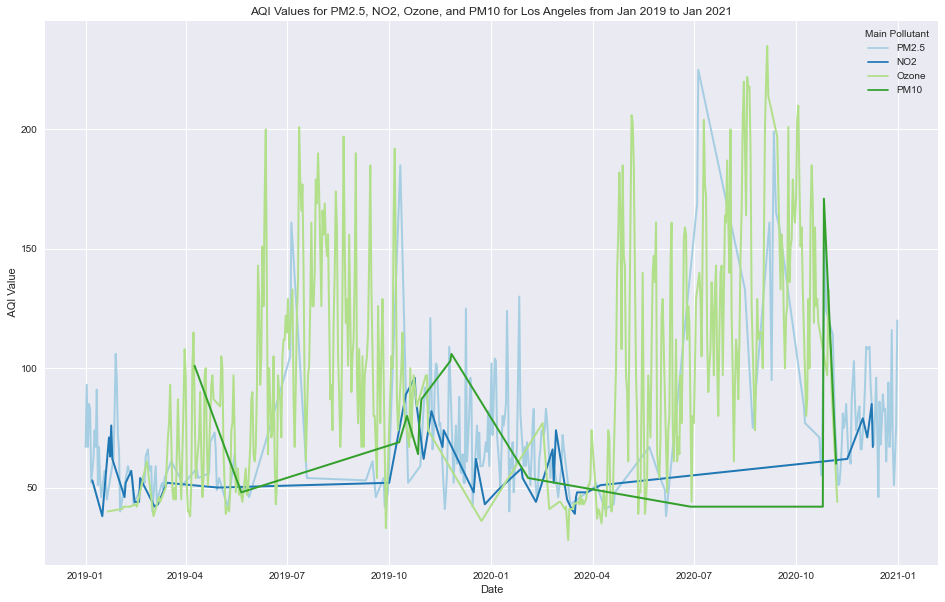

In [34]:
# Create time series for Main Pollutants
plt.style.use('seaborn')
plt.figure(figsize=(16,10))
sns.lineplot(data=pivoted1.reset_index(), x='Date', y=' AQI Value', hue='Main Pollutant', palette='Paired', linewidth= 2.0)
plt.title('AQI Values for PM2.5, NO2, Ozone, and PM10 for Los Angeles from Jan 2019 to Jan 2021')
plt.show()

Ozone levels were especially high during the late summers to fall for Los Angeles. There's seasonality for PM2.5 as well, and a gradual increase between the late summer to fall from 2019 to 2020. 

In [35]:
reset1 = pivoted1.reset_index()
reset1

,Date,Main Pollutant,AQI Value
0,2019-01-01,PM2.5,67
1,2019-01-02,PM2.5,93
2,2019-01-03,PM2.5,67
3,2019-01-04,PM2.5,85
4,2019-01-05,PM2.5,83
...,...,...,...
726,2020-12-27,PM2.5,67
727,2020-12-28,PM2.5,51
728,2020-12-29,PM2.5,64
729,2020-12-30,PM2.5,76


In [36]:
# Create separate df for each pollutant
pm25_la = reset1[reset1["Main Pollutant"]=="PM2.5"]
no2_la = reset1[reset1["Main Pollutant"]=="NO2"]
ozo_la = reset1[reset1["Main Pollutant"]=="Ozone"]
pm10_la = reset1[reset1["Main Pollutant"]=="PM10"]

In [37]:
print(pm25_la.info())
print(no2_la.info())
print(ozo_la.info())
print(pm10_la.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            258 non-null    datetime64[ns]
 1   Main Pollutant  258 non-null    object        
 2    AQI Value      258 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 6 to 708
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            50 non-null     datetime64[ns]
 1   Main Pollutant  50 non-null     object        
 2    AQI Value      50 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 20 to 676
Data columns (total 3 columns):
 #   Column         

In [38]:
# Find out 95% quantile for each main pollutant
print('PM2.5 95 quantile: ', pm25_la.quantile(0.95))
print('NO2 95 quantile: ', no2_la.quantile(0.95))
print('Ozone 95 quantile: ', ozo_la.quantile(0.95))
print('PM10 95 quantile: ', pm10_la.quantile(0.95))

PM2.5 95 quantile:   AQI Value    130.45
Name: 0.95, dtype: float64
NO2 95 quantile:   AQI Value    86.1
Name: 0.95, dtype: float64
Ozone 95 quantile:   AQI Value    192.0
Name: 0.95, dtype: float64
PM10 95 quantile:   AQI Value    128.75
Name: 0.95, dtype: float64


Much higher than Cleveland. 

In [39]:
# Averages for each pollutant
print('PM2.5 average: ', pm25_la.mean())
print('NO2 average: ', no2_la.mean())
print('Ozone average: ', ozo_la.mean())
print('PM10 average: ', pm10_la.mean())

PM2.5 average:   AQI Value    74.387597
dtype: float64
NO2 average:   AQI Value    58.0
dtype: float64
Ozone average:   AQI Value    104.440098
dtype: float64
PM10 average:   AQI Value    78.785714
dtype: float64


That ozone is seriously high. 

In [40]:
# Data Manipulation
# Check max threshold
max_thresh1 = pm25_la.quantile(0.95)
# Identify outliers
outliers2 = pm25_la[pm25_la[' AQI Value'].values > max_thresh1.values]
outliers2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 185 to 665
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            13 non-null     datetime64[ns]
 1   Main Pollutant  13 non-null     object        
 2    AQI Value      13 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 416.0+ bytes


In [41]:
# Find min threshold
min_thresh1 = pm25_la.quantile(0.05)
# Identify outliers
outliers3 = pm25_la[pm25_la[' AQI Value'].values > min_thresh1.values]
outliers3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            245 non-null    datetime64[ns]
 1   Main Pollutant  245 non-null    object        
 2    AQI Value      245 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.7+ KB


In [42]:
# Again, we'll use only max threshold, since eliminating 245 rows is too many
pm25_la_nomaxthresh = pm25_la[(pm25_la[' AQI Value'].values < max_thresh1.values)]
pm25_la_nomaxthresh

,Date,Main Pollutant,AQI Value
0,2019-01-01,PM2.5,67
1,2019-01-02,PM2.5,93
2,2019-01-03,PM2.5,67
3,2019-01-04,PM2.5,85
4,2019-01-05,PM2.5,83
...,...,...,...
726,2020-12-27,PM2.5,67
727,2020-12-28,PM2.5,51
728,2020-12-29,PM2.5,64
729,2020-12-30,PM2.5,76


In [43]:
# Save this file
pm25_la_nomaxthresh.to_excel('ds_la_pm25cle_19to20.xlsx')

### New York, NY

In [44]:
pth2 = r'D:\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\ad_viz_tile_data_ny.xlsx'
ds_ny = pd.read_excel(pth2)
ds_ny

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,2019-01-01,45,PM2.5,MASPETH LIBRARY,36-081-0120,AQS
1,2019-01-02,64,PM2.5,PS 19,36-061-0128,AQS
2,2019-01-03,54,PM2.5,PS 19,36-061-0128,AQS
3,2019-01-04,60,PM2.5,Elizabeth Lab,34-039-0004,AQS
4,2019-01-05,50,PM2.5,DIVISION STREET,36-061-0134,AQS
...,...,...,...,...,...,...
726,2020-12-27,55,PM2.5,EISENHOWER PARK,36-059-0005,AQS
727,2020-12-28,55,PM2.5,Flemington,34-019-0001,AQS
728,2020-12-29,51,PM2.5,NEWBURGH,36-071-0002,AQS
729,2020-12-30,45,PM2.5,Elizabeth Lab,34-039-0004,AQS


In [45]:
# Check nulls
ds_ny.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

In [46]:
ds_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            731 non-null    datetime64[ns]
 1    AQI Value      731 non-null    int64         
 2   Main Pollutant  731 non-null    object        
 3   Site Name       731 non-null    object        
 4   Site ID         731 non-null    object        
 5   Source          731 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 34.4+ KB


In [47]:
# Check unique values for 'Main Pollutant'
ds_ny['Main Pollutant'].unique()

array(['PM2.5', 'NO2', 'Ozone', 'SO2'], dtype=object)

No PM10 recorded here.

In [48]:
pivoted2 = ds_ny.pivot_table(index=['Date', 'Main Pollutant'])
pivoted2.columns

Index([' AQI Value'], dtype='object')

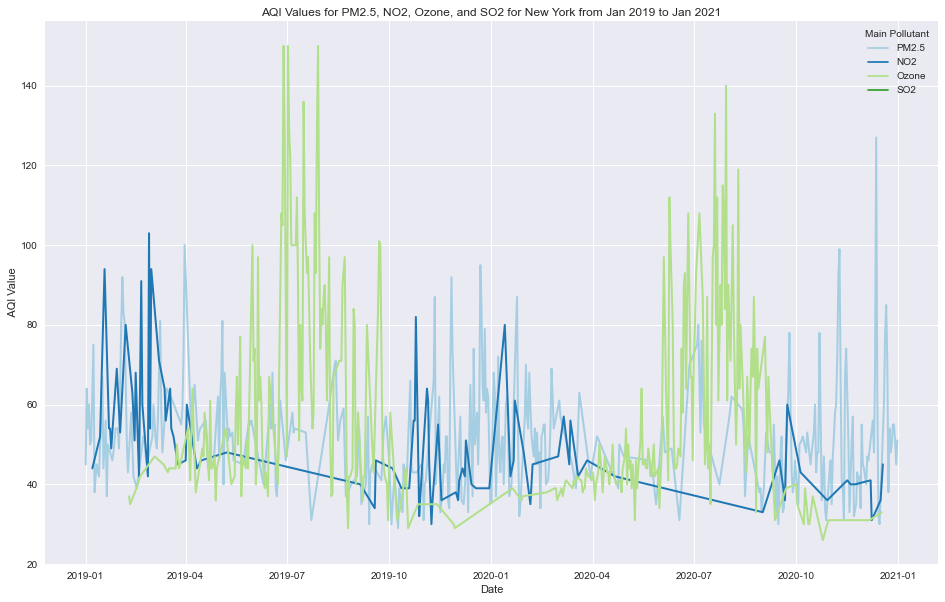

In [49]:
# Create time series for Main Pollutants
plt.style.use('seaborn')
plt.figure(figsize=(16,10))
sns.lineplot(data=pivoted2.reset_index(), x='Date', y=' AQI Value', hue='Main Pollutant', palette='Paired', linewidth= 2.0)
plt.title('AQI Values for PM2.5, NO2, Ozone, and SO2 for New York from Jan 2019 to Jan 2021')
plt.show()

In [50]:
reset2 = pivoted2.reset_index()
reset2

,Date,Main Pollutant,AQI Value
0,2019-01-01,PM2.5,45
1,2019-01-02,PM2.5,64
2,2019-01-03,PM2.5,54
3,2019-01-04,PM2.5,60
4,2019-01-05,PM2.5,50
...,...,...,...
726,2020-12-27,PM2.5,55
727,2020-12-28,PM2.5,55
728,2020-12-29,PM2.5,51
729,2020-12-30,PM2.5,45


In [51]:
# Create separate df for each pollutant
pm25_ny = reset2[reset2["Main Pollutant"]=="PM2.5"]
no2_ny = reset2[reset2["Main Pollutant"]=="NO2"]
ozo_ny = reset2[reset2["Main Pollutant"]=="Ozone"]
so2_ny = reset2[reset2["Main Pollutant"]=="SO2"]

In [52]:
print(pm25_ny.info())
print(no2_ny.info())
print(ozo_ny.info())
print(so2_ny.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            348 non-null    datetime64[ns]
 1   Main Pollutant  348 non-null    object        
 2    AQI Value      348 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 6 to 717
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            86 non-null     datetime64[ns]
 1   Main Pollutant  86 non-null     object        
 2    AQI Value      86 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 39 to 716
Data columns (total 3 columns):
 #   Column        

In [53]:
# Find out 95% quantile for each main pollutant
print('PM2.5 95 quantile: ', pm25_ny.quantile(0.95))
print('NO2 95 quantile: ', no2_ny.quantile(0.95))
print('Ozone 95 quantile: ', ozo_ny.quantile(0.95))
print('SO2 95 quantile: ', so2_ny.quantile(0.95))

PM2.5 95 quantile:   AQI Value    79.0
Name: 0.95, dtype: float64
NO2 95 quantile:   AQI Value    81.5
Name: 0.95, dtype: float64
Ozone 95 quantile:   AQI Value    109.0
Name: 0.95, dtype: float64
SO2 95 quantile:   AQI Value    54.0
Name: 0.95, dtype: float64


In [54]:
# Averages for each pollutant
print('PM2.5 average: ', pm25_ny.mean())
print('NO2 average: ', no2_ny.mean())
print('Ozone average: ', ozo_ny.mean())
print('SO2 average: ', so2_ny.mean())

PM2.5 average:   AQI Value    51.956897
dtype: float64
NO2 average:   AQI Value    50.604651
dtype: float64
Ozone average:   AQI Value    59.293919
dtype: float64
SO2 average:   AQI Value    54.0
dtype: float64


In [55]:
# Data Manipulation
# Check max threshold
max_thresh2 = pm25_ny.quantile(0.95)
# Identify outliers
outliers4 = pm25_ny[pm25_ny[' AQI Value'].values > max_thresh2.values]
outliers4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 32 to 720
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            17 non-null     datetime64[ns]
 1   Main Pollutant  17 non-null     object        
 2    AQI Value      17 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 544.0+ bytes


In [56]:
# Find min threshold
min_thresh2 = pm25_ny.quantile(0.05)
# Identify outliers
outliers5 = pm25_ny[pm25_ny[' AQI Value'].values > min_thresh2.values]
outliers5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            328 non-null    datetime64[ns]
 1   Main Pollutant  328 non-null    object        
 2    AQI Value      328 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.2+ KB


In [57]:
# Again, we'll use only max threshold, since eliminating 328 rows is too many
pm25_ny_nomaxthresh = pm25_ny[(pm25_ny[' AQI Value'].values < max_thresh2.values)]
pm25_ny_nomaxthresh

,Date,Main Pollutant,AQI Value
0,2019-01-01,PM2.5,45
1,2019-01-02,PM2.5,64
2,2019-01-03,PM2.5,54
3,2019-01-04,PM2.5,60
4,2019-01-05,PM2.5,50
...,...,...,...
726,2020-12-27,PM2.5,55
727,2020-12-28,PM2.5,55
728,2020-12-29,PM2.5,51
729,2020-12-30,PM2.5,45


In [58]:
# Save file
pm25_ny_nomaxthresh.to_excel('ds_ny_pm25cle_19to20.xlsx')

### Tampa, FL

In [59]:
pth3 = r'D:\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\ad_viz_tile_data_tampa.xlsx'
ds_tpa = pd.read_excel(pth3)
ds_tpa

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,2019-01-01,66,PM2.5,USMC Reserve Center (Gandy),12-057-1065,AQS
1,2019-01-02,51,PM10,County Motorpool,12-103-3004,AQS
2,2019-01-03,33,PM2.5,USMC Reserve Center (Gandy),12-057-1065,AQS
3,2019-01-04,40,Ozone,Holiday,12-101-2001,AQS
4,2019-01-05,40,Ozone,Holiday,12-101-2001,AQS
...,...,...,...,...,...,...
726,2020-12-27,52,PM2.5,SYDNEY,12-057-3002,AQS
727,2020-12-28,38,Ozone,Simmons Park,12-057-0081,AQS
728,2020-12-29,41,Ozone,St. Petersburg College,12-103-0004,AQS
729,2020-12-30,37,Ozone,Simmons Park,12-057-0081,AQS


In [60]:
ds_tpa.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

In [61]:
ds_tpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            731 non-null    datetime64[ns]
 1    AQI Value      731 non-null    int64         
 2   Main Pollutant  731 non-null    object        
 3   Site Name       731 non-null    object        
 4   Site ID         731 non-null    object        
 5   Source          731 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 34.4+ KB


In [62]:
# Check unique values for 'Main Pollutant'
ds_tpa['Main Pollutant'].unique()

array(['PM2.5', 'PM10', 'Ozone', 'SO2'], dtype=object)

No NO2 here.

In [63]:
pivoted3 = ds_tpa.pivot_table(index=['Date', 'Main Pollutant'])
pivoted3.columns

Index([' AQI Value'], dtype='object')

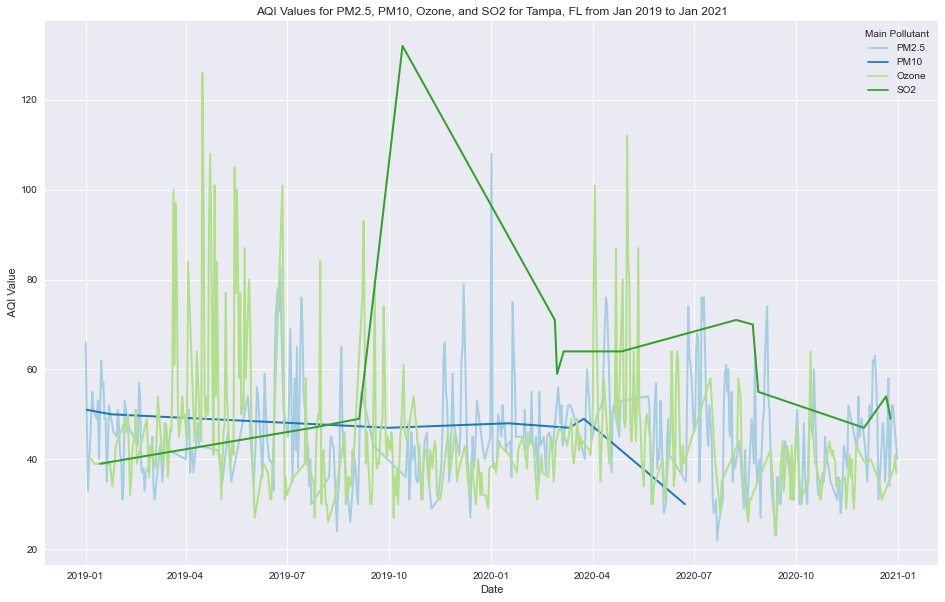

In [64]:
# Create time series for Main Pollutants
plt.style.use('seaborn')
plt.figure(figsize=(16,10))
sns.lineplot(data=pivoted3.reset_index(), x='Date', y=' AQI Value', hue='Main Pollutant', palette='Paired', linewidth= 2.0)
plt.title('AQI Values for PM2.5, PM10, Ozone, and SO2 for Tampa, FL from Jan 2019 to Jan 2021')
plt.show()

In [65]:
reset3 = pivoted3.reset_index()
reset3

,Date,Main Pollutant,AQI Value
0,2019-01-01,PM2.5,66
1,2019-01-02,PM10,51
2,2019-01-03,PM2.5,33
3,2019-01-04,Ozone,40
4,2019-01-05,Ozone,40
...,...,...,...
726,2020-12-27,PM2.5,52
727,2020-12-28,Ozone,38
728,2020-12-29,Ozone,41
729,2020-12-30,Ozone,37


In [66]:
# Create separate df for each pollutant
pm25_tpa = reset3[reset3["Main Pollutant"]=="PM2.5"]
pm10_tpa = reset3[reset3["Main Pollutant"]=="PM10"]
ozo_tpa = reset3[reset3["Main Pollutant"]=="Ozone"]
so2_tpa = reset3[reset3["Main Pollutant"]=="SO2"]

In [67]:
print(pm25_tpa.info())
print(pm10_tpa.info())
print(ozo_tpa.info())
print(so2_tpa.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            358 non-null    datetime64[ns]
 1   Main Pollutant  358 non-null    object        
 2    AQI Value      358 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1 to 539
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            7 non-null      datetime64[ns]
 1   Main Pollutant  7 non-null      object        
 2    AQI Value      7 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 224.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 3 to 729
Data columns (total 3 columns):
 #   Column     

In [68]:
# Find out 95% quantile for each main pollutant
print('PM2.5 95 quantile: ', pm25_tpa.quantile(0.95))
print('PM10 95 quantile: ', pm10_tpa.quantile(0.95))
print('Ozone 95 quantile: ', ozo_tpa.quantile(0.95))
print('SO2 95 quantile: ', so2_tpa.quantile(0.95))

PM2.5 95 quantile:   AQI Value    70.0
Name: 0.95, dtype: float64
PM10 95 quantile:   AQI Value    50.7
Name: 0.95, dtype: float64
Ozone 95 quantile:   AQI Value    84.0
Name: 0.95, dtype: float64
SO2 95 quantile:   AQI Value    92.35
Name: 0.95, dtype: float64


In [69]:
# Averages for each pollutant
print('PM2.5 average: ', pm25_tpa.mean())
print('PM10 average: ', pm10_tpa.mean())
print('Ozone average: ', ozo_tpa.mean())
print('SO2 average: ', so2_tpa.mean())

PM2.5 average:   AQI Value    46.23743
dtype: float64
PM10 average:   AQI Value    46.0
dtype: float64
Ozone average:   AQI Value    46.377841
dtype: float64
SO2 average:   AQI Value    62.214286
dtype: float64


In [70]:
# Data Manipulation
# Check max threshold
max_thresh3 = pm25_tpa.quantile(0.95)
# Identify outliers
outliers6 = pm25_tpa[pm25_tpa[' AQI Value'].values > max_thresh3.values]
outliers6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 171 to 613
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            16 non-null     datetime64[ns]
 1   Main Pollutant  16 non-null     object        
 2    AQI Value      16 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 512.0+ bytes


In [71]:
# Find min threshold
min_thresh3 = pm25_tpa.quantile(0.05)
# Identify outliers
outliers7 = pm25_tpa[pm25_tpa[' AQI Value'].values > min_thresh3.values]
outliers7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            336 non-null    datetime64[ns]
 1   Main Pollutant  336 non-null    object        
 2    AQI Value      336 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.5+ KB


In [72]:
# Again, we'll use only max threshold, since eliminating 328 rows is too many
pm25_tpa_nomaxthresh = pm25_tpa[(pm25_tpa[' AQI Value'].values < max_thresh3.values)]
pm25_tpa_nomaxthresh

,Date,Main Pollutant,AQI Value
0,2019-01-01,PM2.5,66
2,2019-01-03,PM2.5,33
6,2019-01-07,PM2.5,55
7,2019-01-08,PM2.5,51
10,2019-01-11,PM2.5,49
...,...,...,...
722,2020-12-23,PM2.5,58
723,2020-12-24,PM2.5,34
725,2020-12-26,PM2.5,52
726,2020-12-27,PM2.5,52


In [73]:
# Save file
pm25_tpa_nomaxthresh.to_excel('ds_tpa_pm25cle_19to20.xlsx')

In [74]:
# Check for nulls
pm25_cle_nomaxthresh.isnull().sum()

Date              0
Main Pollutant    0
 AQI Value        0
dtype: int64

In [75]:
# Check for nulls
pm25_la_nomaxthresh.isnull().sum()

Date              0
Main Pollutant    0
 AQI Value        0
dtype: int64

In [76]:
# Check for nulls
pm25_ny_nomaxthresh.isnull().sum()

Date              0
Main Pollutant    0
 AQI Value        0
dtype: int64

In [77]:
# Check for nulls
pm25_tpa_nomaxthresh.isnull().sum()

Date              0
Main Pollutant    0
 AQI Value        0
dtype: int64

# Yearly Average AQI

### Cleveland-Elyria, OH

In [78]:
pm25_cle_nomaxthresh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            394 non-null    datetime64[ns]
 1   Main Pollutant  394 non-null    object        
 2    AQI Value      394 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.3+ KB


In [79]:
pm25_cle_indexed = pm25_cle_nomaxthresh.set_index('Date')
pm25_cle_indexed

,Main Pollutant,AQI Value
Date,,
2019-01-01,PM2.5,39
2019-01-02,PM2.5,55
2019-01-03,PM2.5,48
2019-01-04,PM2.5,66
2019-01-06,PM2.5,43
...,...,...
2020-12-27,PM2.5,55
2020-12-28,PM2.5,51
2020-12-29,PM2.5,48


In [80]:
# We'll use the full data for PM2.5 and not the modified
# calculate the yearly average AQI 
pm25_cle_indexed[' AQI_Value'] = pm25_cle_indexed.mean(axis=1)

# drop columns containing monthly values
pivoted_monthly = pm25_cle_indexed[[' AQI_Value']]

# visualize the first 5 columns
pivoted_monthly.head()

,AQI_Value
Date,
2019-01-01,39.0
2019-01-02,55.0
2019-01-03,48.0
2019-01-04,66.0
2019-01-06,43.0


### Los Angeles-Long Beach-Anaheim, CA

In [81]:
pm25_la_nomaxthresh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            245 non-null    datetime64[ns]
 1   Main Pollutant  245 non-null    object        
 2    AQI Value      245 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.7+ KB


In [82]:
pm25_la_indexed = pm25_la_nomaxthresh.set_index('Date')
pm25_la_indexed

,Main Pollutant,AQI Value
Date,,
2019-01-01,PM2.5,67
2019-01-02,PM2.5,93
2019-01-03,PM2.5,67
2019-01-04,PM2.5,85
2019-01-05,PM2.5,83
...,...,...
2020-12-27,PM2.5,67
2020-12-28,PM2.5,51
2020-12-29,PM2.5,64


In [83]:
# calculate the yearly average AQI 
pm25_la_indexed[' AQI_Value'] = pm25_la_indexed.mean(axis=1)

# drop columns containing monthly values
pivoted_monthly1 = pm25_la_indexed[[' AQI_Value']]

# visualize the first 5 columns
pivoted_monthly1.head()

,AQI_Value
Date,
2019-01-01,67.0
2019-01-02,93.0
2019-01-03,67.0
2019-01-04,85.0
2019-01-05,83.0


### New York, NY

In [84]:
pm25_ny_nomaxthresh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            329 non-null    datetime64[ns]
 1   Main Pollutant  329 non-null    object        
 2    AQI Value      329 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.3+ KB


In [85]:
pm25_ny_indexed = pm25_ny_nomaxthresh.set_index('Date')
pm25_ny_indexed

,Main Pollutant,AQI Value
Date,,
2019-01-01,PM2.5,45
2019-01-02,PM2.5,64
2019-01-03,PM2.5,54
2019-01-04,PM2.5,60
2019-01-05,PM2.5,50
...,...,...
2020-12-27,PM2.5,55
2020-12-28,PM2.5,55
2020-12-29,PM2.5,51


In [86]:
# calculate the yearly average AQI 
pm25_ny_indexed[' AQI_Value'] = pm25_ny_indexed.mean(axis=1)

# drop columns containing monthly values
pivoted_monthly2 = pm25_ny_indexed[[' AQI_Value']]

# visualize the first 5 columns
pivoted_monthly2.head()

,AQI_Value
Date,
2019-01-01,45.0
2019-01-02,64.0
2019-01-03,54.0
2019-01-04,60.0
2019-01-05,50.0


### Tampa, FL

In [87]:
pm25_tpa_nomaxthresh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            338 non-null    datetime64[ns]
 1   Main Pollutant  338 non-null    object        
 2    AQI Value      338 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.6+ KB


In [88]:
pm25_tpa_indexed = pm25_tpa_nomaxthresh.set_index('Date')
pm25_tpa_indexed

,Main Pollutant,AQI Value
Date,,
2019-01-01,PM2.5,66
2019-01-03,PM2.5,33
2019-01-07,PM2.5,55
2019-01-08,PM2.5,51
2019-01-11,PM2.5,49
...,...,...
2020-12-23,PM2.5,58
2020-12-24,PM2.5,34
2020-12-26,PM2.5,52


In [89]:
# calculate the yearly average AQI 
pm25_tpa_indexed[' AQI_Value'] = pm25_tpa_indexed.mean(axis=1)

# drop columns containing monthly values
pivoted_monthly3 = pm25_tpa_indexed[[' AQI_Value']]

# visualize the first 5 columns
pivoted_monthly3.head()

,AQI_Value
Date,
2019-01-01,66.0
2019-01-03,33.0
2019-01-07,55.0
2019-01-08,51.0
2019-01-11,49.0


In [90]:
pivoted_monthly3.isnull().sum()

 AQI_Value    0
dtype: int64

In [91]:
# Rename AQI_Value to AQI TPA
pivoted_monthly.rename({' AQI_Value': 'AQI Value CLE'}, axis=1, inplace=True)
# Rename AQI_Value to AQI TPA
pivoted_monthly1.rename({' AQI_Value': 'AQI Value LA'}, axis=1, inplace=True)
# Rename AQI_Value to AQI TPA
pivoted_monthly2.rename({' AQI_Value': 'AQI Value NY'}, axis=1, inplace=True)
# Rename AQI_Value to AQI TPA
pivoted_monthly3.rename({' AQI_Value': 'AQI Value TPA'}, axis=1, inplace=True)

# Merge PM2.5

In [92]:
dfs = [pivoted_monthly,pivoted_monthly1,pivoted_monthly2,pivoted_monthly3]
nan_value=0

merged = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, 
                                              left_index=True, right_index=True, 
                                              how='inner'), dfs).fillna(nan_value)

In [93]:
merged

,AQI Value CLE,AQI Value LA,AQI Value NY,AQI Value TPA
Date,,,,
2019-01-01,39.0,67.0,45.0,66.0
2019-01-03,48.0,67.0,54.0,33.0
2019-01-08,40.0,62.0,75.0,51.0
2019-01-11,41.0,91.0,45.0,49.0
2019-01-12,53.0,51.0,43.0,53.0
...,...,...,...,...
2020-12-23,43.0,94.0,38.0,58.0
2020-12-24,37.0,67.0,54.0,34.0
2020-12-26,51.0,116.0,50.0,52.0


In [101]:
merged['AQI Value LA'].isnull().sum()

0

# Time Series PM2.5

### All 4 cities

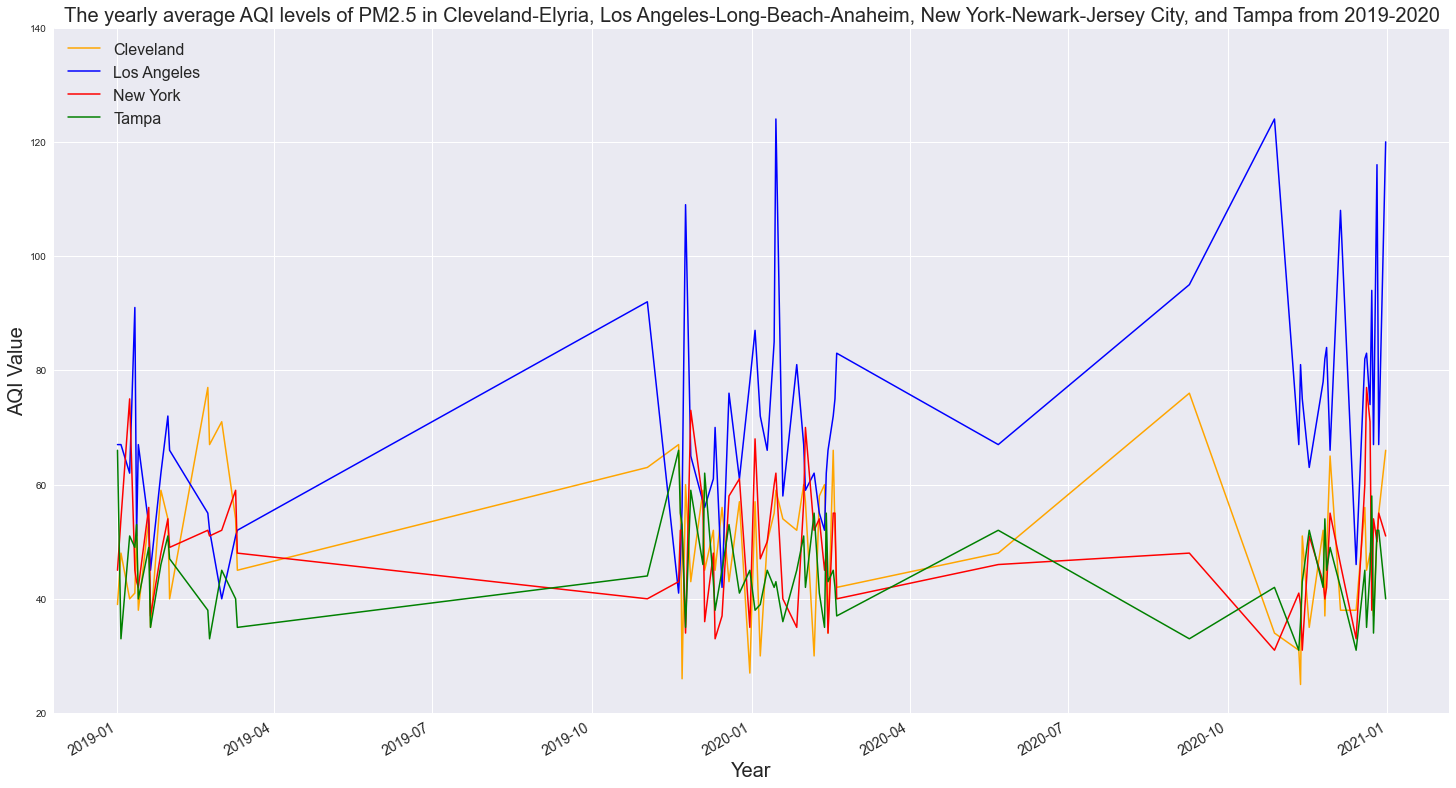

In [94]:
plt.style.use('seaborn')
plt.figure(figsize=(25,14))

# line plot - the yearly average AQI in Cleveland-Elyria, OH and Los Angeles, CA
ax1 = merged['AQI Value CLE'].plot(color='orange', linewidth=1.5, grid=True, label='Cleveland')
ax2 = merged['AQI Value LA'].plot(color='blue', linewidth=1.5, grid=True, label='Los Angeles')
ax3 = merged['AQI Value NY'].plot(color='red', linewidth=1.5, grid=True, label='New York')
ax4 = merged['AQI Value TPA'].plot(color='green', linewidth=1.5, grid=True, label='Tampa')
ax1.legend(fontsize=16, loc=1)
ax2.legend(fontsize=16, loc=1)
ax3.legend(fontsize=16, loc=2)
ax4.legend(fontsize=16, loc=2)


# title and labels
plt.title('The yearly average AQI levels of PM2.5 in Cleveland-Elyria, Los Angeles-Long-Beach-Anaheim, New York-Newark-Jersey City, and Tampa from 2019-2020', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('AQI Value', fontsize=20)
plt.xticks(fontsize=14)
plt.ylim(20,140)
plt.show()

### CLE and LA

In [109]:
aqi_df = pd.merge(pivoted_monthly, pivoted_monthly1, on='Date', suffixes=['_l', '_r'])
aqi_df.head()

,AQI Value CLE,AQI Value LA
Date,,
2019-01-01,39.0,67.0
2019-01-02,55.0,93.0
2019-01-03,48.0,67.0
2019-01-04,66.0,85.0
2019-01-06,43.0,52.0


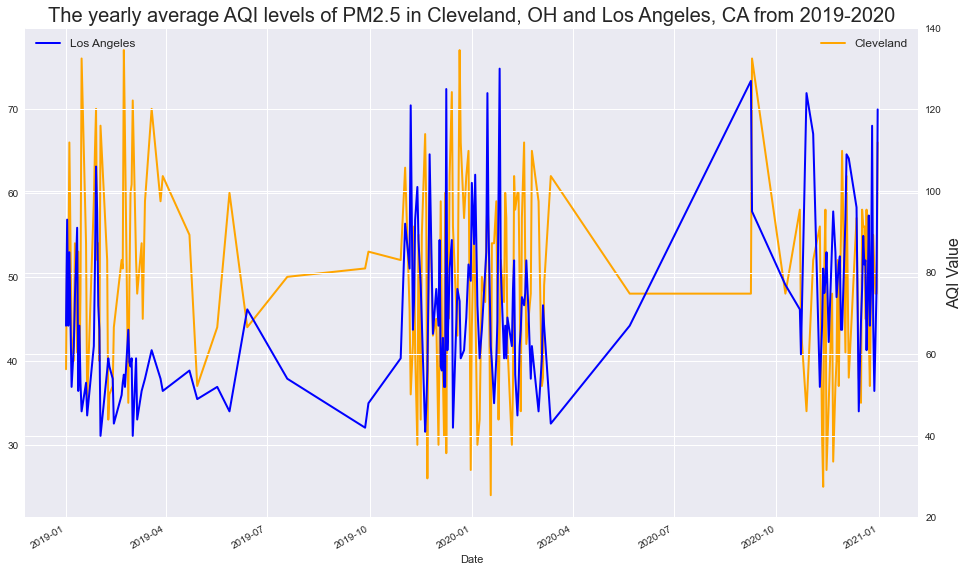

In [112]:
plt.style.use('seaborn')
plt.figure(figsize=(16,10))

# line plot - the yearly average AQI in New York and Tampa, FL
ax = aqi_df['AQI Value CLE'].plot(color='orange', linewidth=2, grid=True, label='Cleveland')
ax1 = aqi_df['AQI Value LA'].plot(color='blue', linewidth=2, grid=True, label='Los Angeles', secondary_y=True)
ax.legend(fontsize=12, loc=1)
ax1.legend(fontsize=12, loc=2)


# title and labels
plt.title('The yearly average AQI levels of PM2.5 in Cleveland, OH and Los Angeles, CA from 2019-2020', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('AQI Value', fontsize=16)
plt.ylim(20,140)
plt.show()

### LA and NY

In [113]:
aqi_df2 = pd.merge(pivoted_monthly1, pivoted_monthly2, on='Date', suffixes=['_l', '_r'])
aqi_df2.head()

,AQI Value LA,AQI Value NY
Date,,
2019-01-01,67.0,45.0
2019-01-02,93.0,64.0
2019-01-03,67.0,54.0
2019-01-04,85.0,60.0
2019-01-05,83.0,50.0


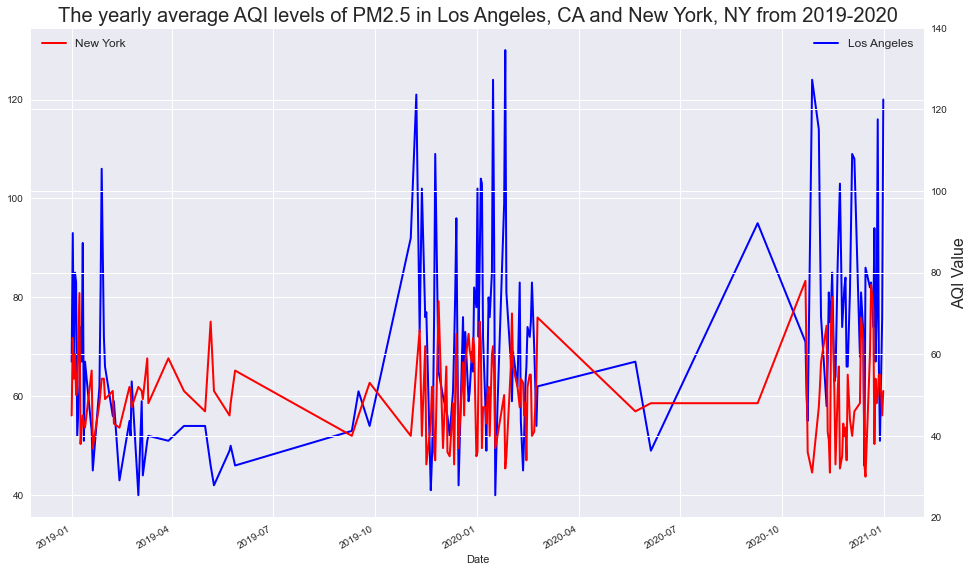

In [114]:
plt.style.use('seaborn')
plt.figure(figsize=(16,10))

# line plot - the yearly average AQI in New York and Tampa, FL
ax1 = aqi_df2['AQI Value LA'].plot(color='blue', linewidth=2, grid=True, label='Los Angeles')
ax2 = aqi_df2['AQI Value NY'].plot(color='red', linewidth=2, grid=True, label='New York', secondary_y=True)
ax1.legend(fontsize=12, loc=1)
ax2.legend(fontsize=12, loc=2)


# title and labels
plt.title('The yearly average AQI levels of PM2.5 in Los Angeles, CA and New York, NY from 2019-2020', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('AQI Value', fontsize=16)
plt.ylim(20,140)
plt.show()

### NY and Tampa

In [115]:
aqi_df3 = pd.merge(pivoted_monthly2, pivoted_monthly3, on='Date', suffixes=['_l', '_r'])
aqi_df3.head()

,AQI Value NY,AQI Value TPA
Date,,
2019-01-01,45.0,66.0
2019-01-03,54.0,33.0
2019-01-08,75.0,51.0
2019-01-11,45.0,49.0
2019-01-12,43.0,53.0


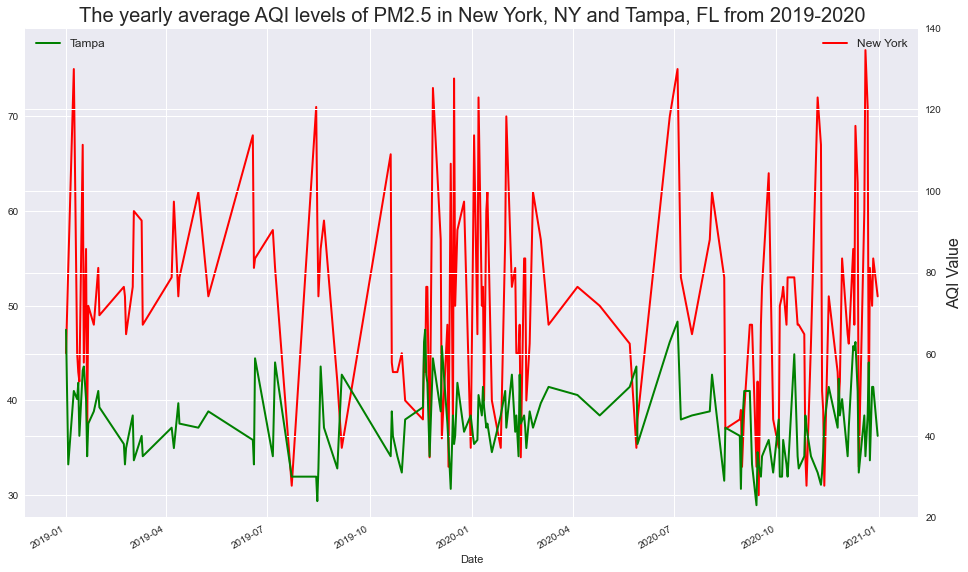

In [117]:
plt.style.use('seaborn')
plt.figure(figsize=(16,10))

# line plot - the yearly average AQI in New York and Tampa, FL
ax1 = aqi_df3['AQI Value NY'].plot(color='red', linewidth=2, grid=True, label='New York')
ax2 = aqi_df3['AQI Value TPA'].plot(color='green', linewidth=2, grid=True, label='Tampa', secondary_y=True)
ax1.legend(fontsize=12, loc=1)
ax2.legend(fontsize=12, loc=2)


# title and labels
plt.title('The yearly average AQI levels of PM2.5 in New York, NY and Tampa, FL from 2019-2020', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('AQI Value', fontsize=16)
plt.ylim(20,140)
plt.show()